In [1]:
import numpy as np
from auxiliarymethods import  datasets as dp 
import auxiliarymethods.auxiliary_methods as aux
from matplotlib import pyplot as plt
from auxiliarymethods import reader
import pandas as pd
from sources import graph_analysis,clustering,dimensionality_reduction,outlier_detection, visualization, utility_functions
import networkx as nx
import seaborn as sns

# Which ego-graphs are outliers and how do their corresponding graphs look like? 

Load imdb-network:

In [2]:
imdb_networkx = reader.tud_to_networkx("IMDB-BINARY")

Load each dataset and save it in variables:

In [3]:
classes = dp.get_dataset("IMDB-BINARY")
imdb_wl1_vectors = aux.normalize_feature_vector(utility_functions.load_sparse("../../graph_representations/without_labels/IMDB-BINARY_vectors_wl1.npz"))
imdb_wl2_vectors = aux.normalize_feature_vector(utility_functions.load_sparse("../../graph_representations/without_labels/IMDB-BINARY_vectors_wl2.npz"))
imdb_wl3_vectors = aux.normalize_feature_vector(utility_functions.load_sparse("../../graph_representations/without_labels/IMDB-BINARY_vectors_wl3.npz"))
imdb_wl4_vectors = aux.normalize_feature_vector(utility_functions.load_sparse("../../graph_representations/without_labels/IMDB-BINARY_vectors_wl4.npz"))
imdb_wl5_vectors = aux.normalize_feature_vector(utility_functions.load_sparse("../../graph_representations/without_labels/IMDB-BINARY_vectors_wl5.npz"))
imdb_graphlet_vectors = aux.normalize_feature_vector(utility_functions.load_sparse("../../graph_representations/without_labels/IMDB-BINARY_vectors_graphlet.npz"))
imdb_shortestpath_vectors = aux.normalize_feature_vector(utility_functions.load_sparse("../../graph_representations/without_labels/IMDB-BINARY_vectors_shortestpath.npz"))

imdb_wl1_gram = aux.normalize_gram_matrix(utility_functions.load_csv("../../graph_representations/without_labels/IMDB-BINARY_gram_matrix_wl1.csv"))
imdb_wl2_gram = aux.normalize_gram_matrix(utility_functions.load_csv("../../graph_representations/without_labels/IMDB-BINARY_gram_matrix_wl2.csv"))
imdb_wl3_gram = aux.normalize_gram_matrix(utility_functions.load_csv("../../graph_representations/without_labels/IMDB-BINARY_gram_matrix_wl3.csv"))
imdb_wl4_gram = aux.normalize_gram_matrix(utility_functions.load_csv("../../graph_representations/without_labels/IMDB-BINARY_gram_matrix_wl4.csv"))
imdb_wl5_gram = aux.normalize_gram_matrix(utility_functions.load_csv("../../graph_representations/without_labels/IMDB-BINARY_gram_matrix_wl5.csv"))
imdb_graphlet_gram = aux.normalize_gram_matrix(utility_functions.load_csv("../../graph_representations/without_labels/IMDB-BINARY_gram_matrix_graphlet.csv"))
imdb_shortestpath_gram = aux.normalize_gram_matrix(utility_functions.load_csv("../../graph_representations/without_labels/IMDB-BINARY_gram_matrix_shortestpath.csv"))

Applying dimensionality reduction on loaded data, to reduce the data to the most nessesary freatures. Here we reduce each of the datasets to 100 components.

In [4]:
tsvd_wl1_vectors = dimensionality_reduction.truncatedSVD(imdb_wl1_vectors, 100)
tsvd_wl2_vectors = dimensionality_reduction.truncatedSVD(imdb_wl2_vectors, 100)
tsvd_wl3_vectors = dimensionality_reduction.truncatedSVD(imdb_wl3_vectors, 100)
tsvd_wl4_vectors = dimensionality_reduction.truncatedSVD(imdb_wl4_vectors, 100)
tsvd_wl5_vectors = dimensionality_reduction.truncatedSVD(imdb_wl5_vectors, 100)
tsvd_graphlet_vectors = dimensionality_reduction.truncatedSVD(imdb_graphlet_vectors, 100)
tsvd_shortestpath_vectors = dimensionality_reduction.truncatedSVD(imdb_shortestpath_vectors, 100)

kpca_wl1_gram = dimensionality_reduction.kernelPCA(imdb_wl1_gram, 100)
kpca_wl2_gram = dimensionality_reduction.kernelPCA(imdb_wl2_gram, 100)
kpca_wl3_gram = dimensionality_reduction.kernelPCA(imdb_wl3_gram, 100)
kpca_wl4_gram = dimensionality_reduction.kernelPCA(imdb_wl4_gram, 100)
kpca_wl5_gram = dimensionality_reduction.kernelPCA(imdb_wl5_gram, 100)
kpca_graphlet_gram = dimensionality_reduction.kernelPCA(imdb_graphlet_gram, 100)
kpca_shortestpath_gram = dimensionality_reduction.kernelPCA(imdb_shortestpath_gram, 100)
wl_listG = [kpca_wl1_gram,kpca_wl2_gram,kpca_wl3_gram,kpca_wl4_gram,kpca_wl5_gram]
wl_listV = [tsvd_wl1_vectors,tsvd_wl2_vectors,tsvd_wl3_vectors,tsvd_wl4_vectors,tsvd_wl5_vectors]

The svd_energy() function returns the amount of features, that are nessesary to obtain at least 90% of the energy. Here we show an example in the Weisfeiler-Lehman 1 dataset:

In [5]:
tsvd_wl1_vectors_energy = dimensionality_reduction.truncatedSVD(imdb_wl1_vectors, 100)
nrComponentsNeededToObtainEnergy = dimensionality_reduction.svd_energy(imdb_wl1_vectors, 100)
print("The amount of features that should remain to obtain 90% engergy: ", nrComponentsNeededToObtainEnergy)
tsvd_wl1_vectors_energy = np.delete(tsvd_wl1_vectors_energy, range(nrComponentsNeededToObtainEnergy-1, 99), 1)
print("The shape of the data after deleting the redundand columns ",tsvd_wl1_vectors_energy.shape)

The amount of features that should remain to obtain 90% engergy:  11
The shape of the data after deleting the redundand columns  (1000, 11)


Analyze the IMDB-Network:

In [6]:
graphs_romance = imdb_networkx[0:500]
graphs_action = imdb_networkx[500:1001]

graph_analysis.getGraphDataByClass(imdb_networkx,'Entire Dataset')
print()

graph_analysis.getGraphDataByClass(graphs_romance,'ROMANCE')

print()

graph_analysis.getGraphDataByClass(graphs_action,'ACTION')

Entire Dataset: 
Average number of edges:  96.531
Average number of nodes:  19.773
Average number of edges per nodes:  4.8819602488241545
Average density:  0.5206179238965227
Number of isomorphic pairs:  3356

ROMANCE: 
Average number of edges:  96.776
Average number of nodes:  20.114
Average number of edges per nodes:  4.811375161578999
Average density:  0.5592233563663693
Number of isomorphic pairs:  1321

ACTION: 
Average number of edges:  96.286
Average number of nodes:  19.432
Average number of edges per nodes:  4.955022643062989
Average density:  0.4820124914266759
Number of isomorphic pairs:  916


Here we collected some important information about the graphs. In the first block we look at the entire dataset-network, then at the romance-graphs and at the bottom at the action-graphs. We discovered two interesting things: 

The average density for romance-graphs is 0.0772 higher (compared to the action-graphs) and the romance-graphs have more isomorfic graph-pairs (also compared to the action-graphs).

The other information (average number of edges, nodes and edges per node) has not led to any results.

Example graph for genre romance


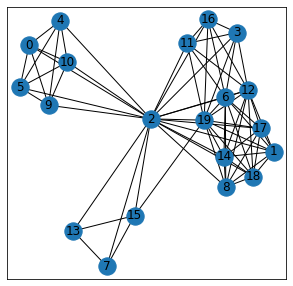


Example graph for genre action


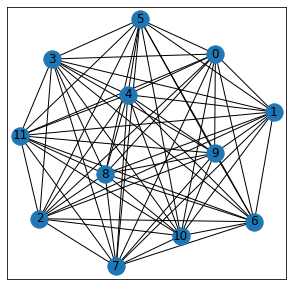

In [7]:
print('Example graph for genre romance')
visualization.visualize(graphs_romance[0])
print()
print('Example graph for genre action')
visualization.visualize(graphs_action[0])

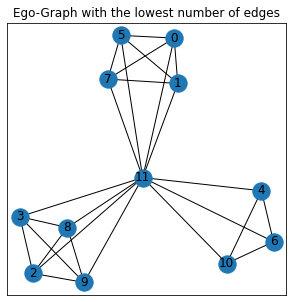

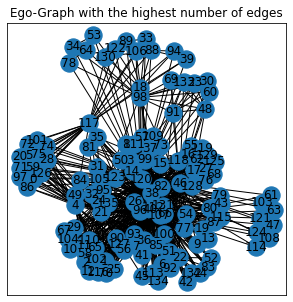

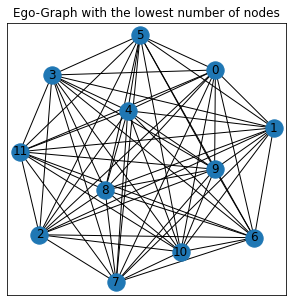

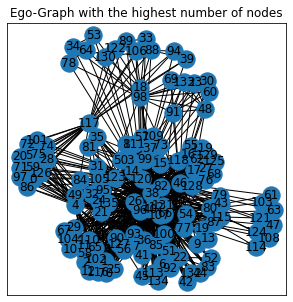

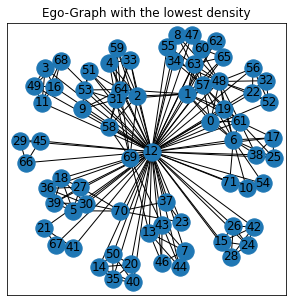

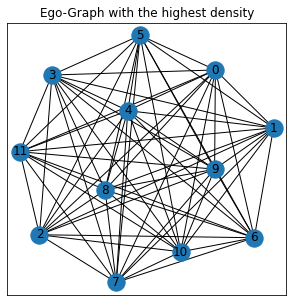

In [8]:
graph_analysis.getExtremeGraphs(imdb_networkx)

Above we see two example ego-networks of different genres.

If you look below you see several plots. Each dataset is plotted four times as you can se below.

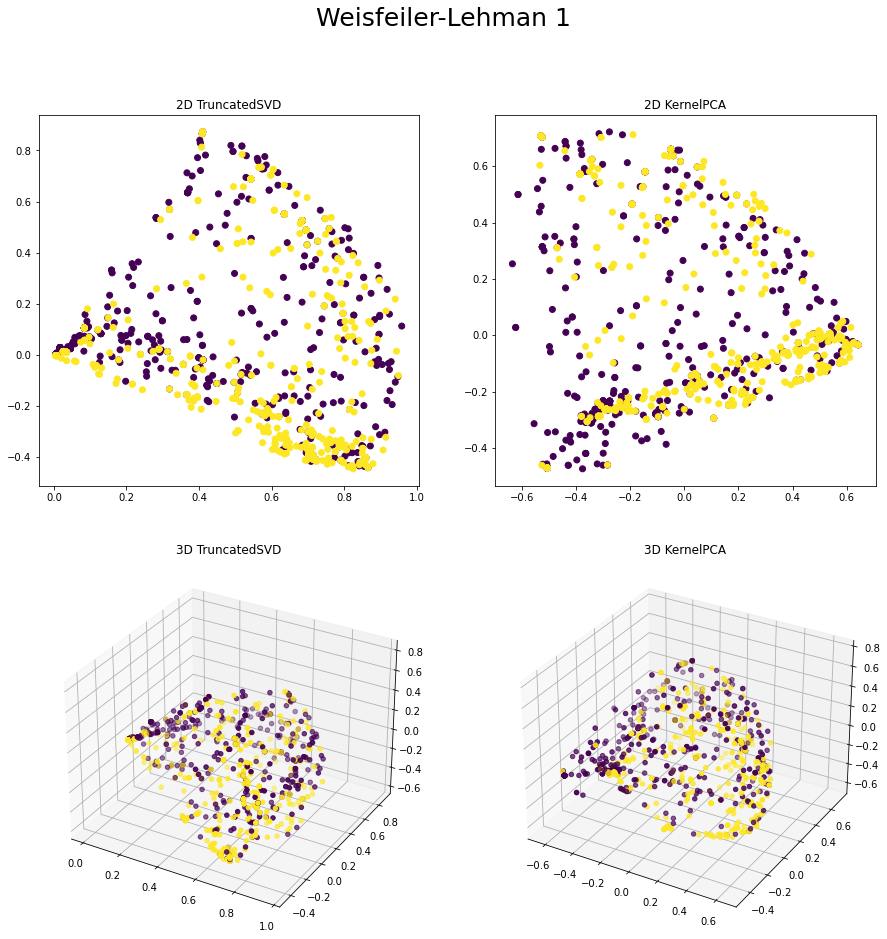

________________________________________________________________________________________



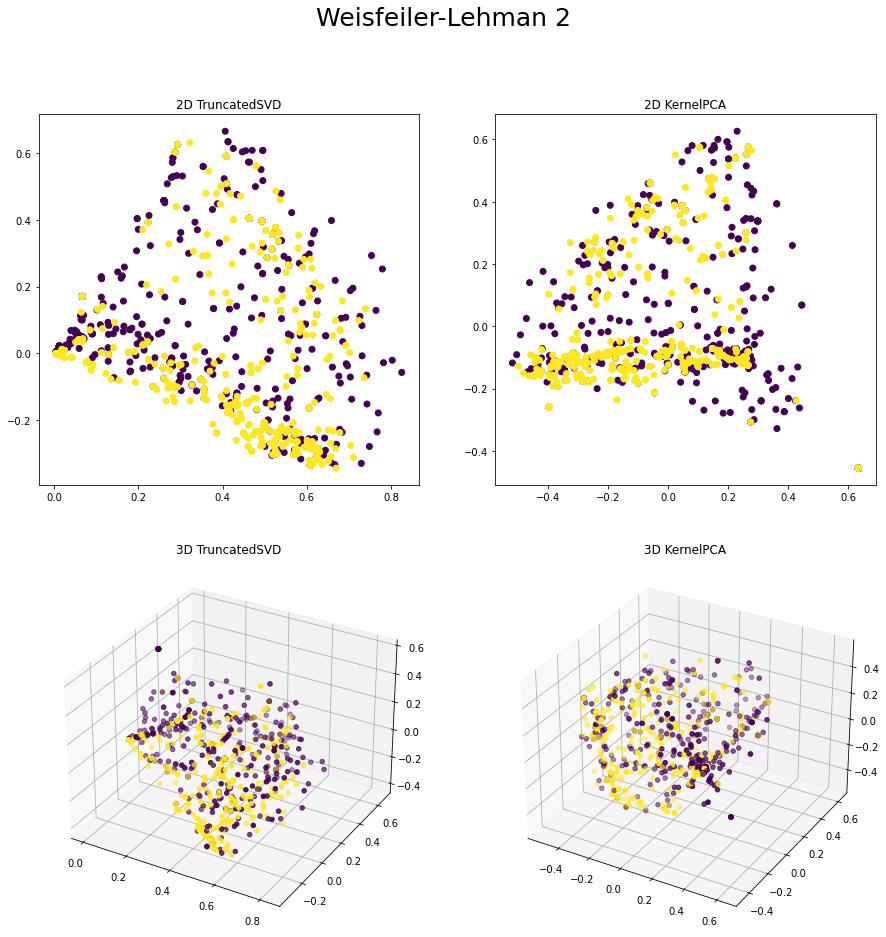

________________________________________________________________________________________



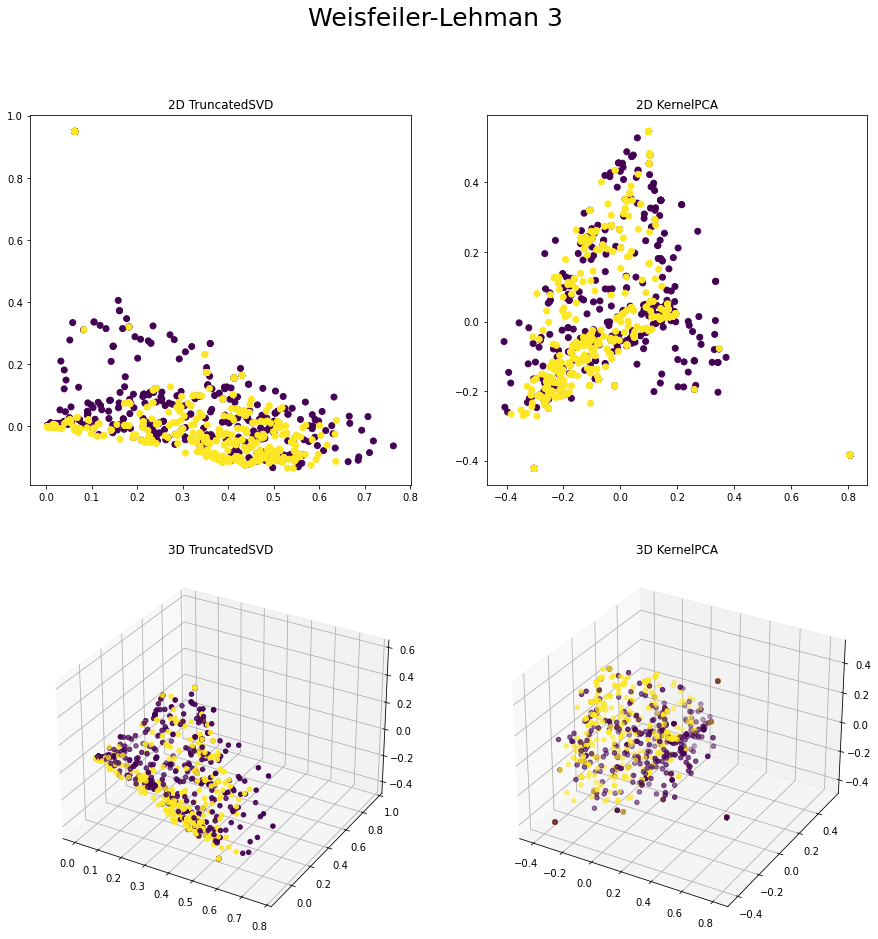

________________________________________________________________________________________



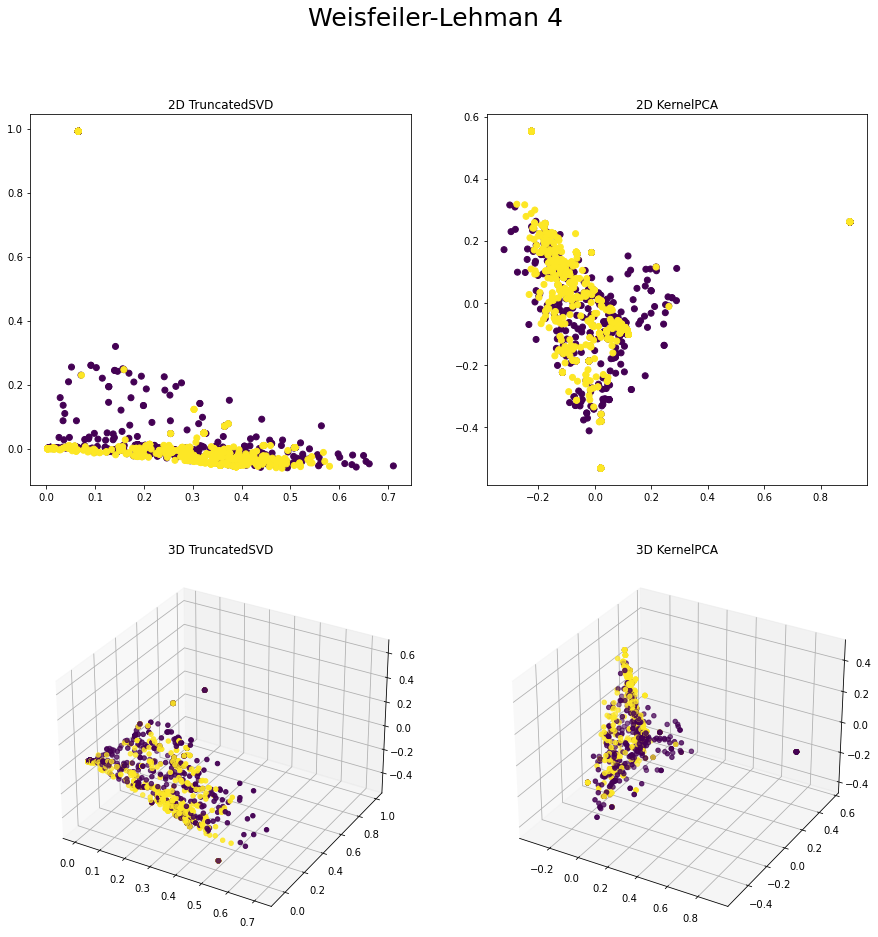

________________________________________________________________________________________



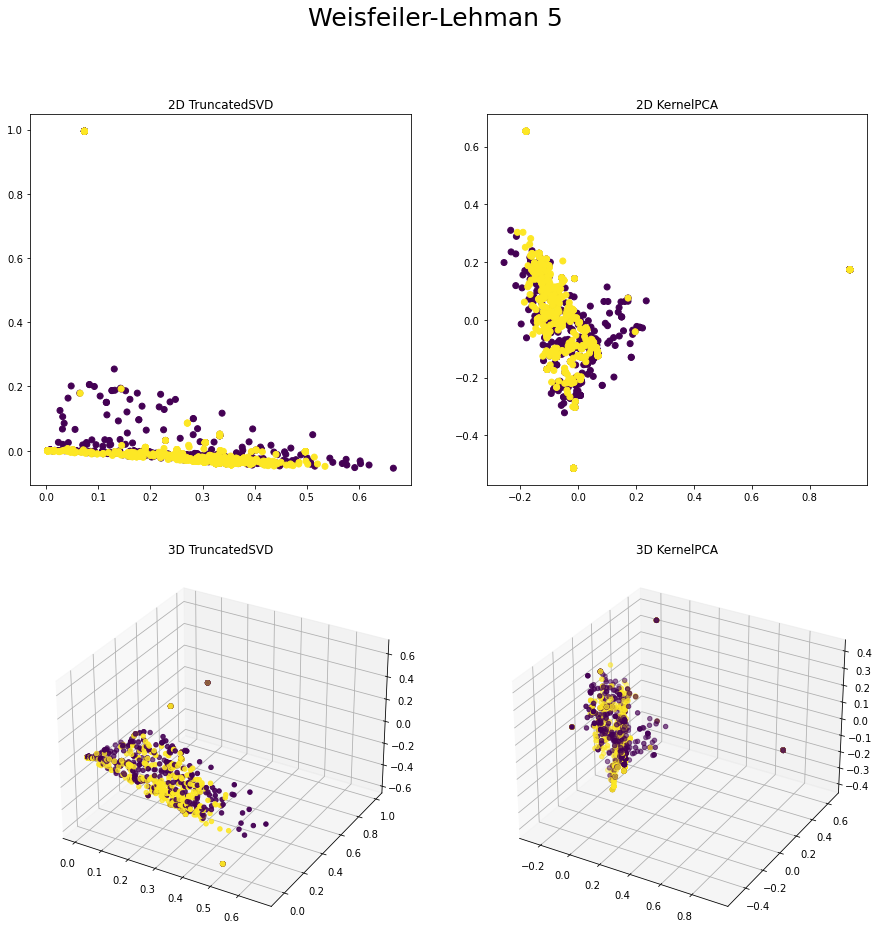

________________________________________________________________________________________



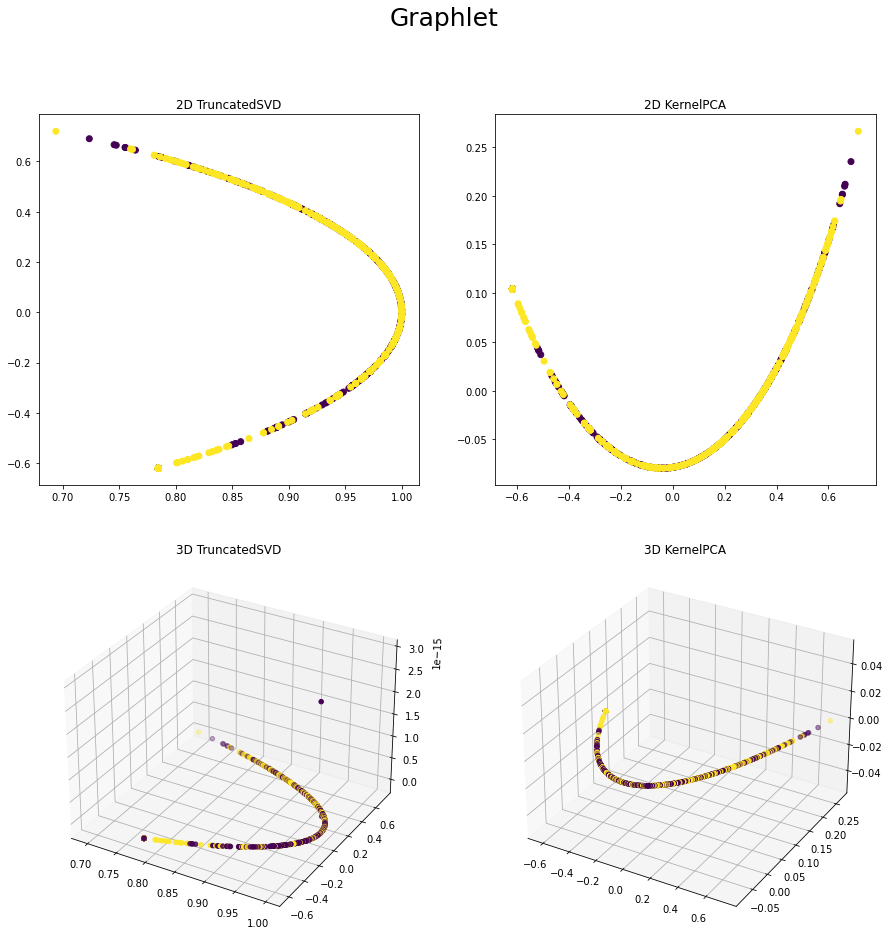

________________________________________________________________________________________



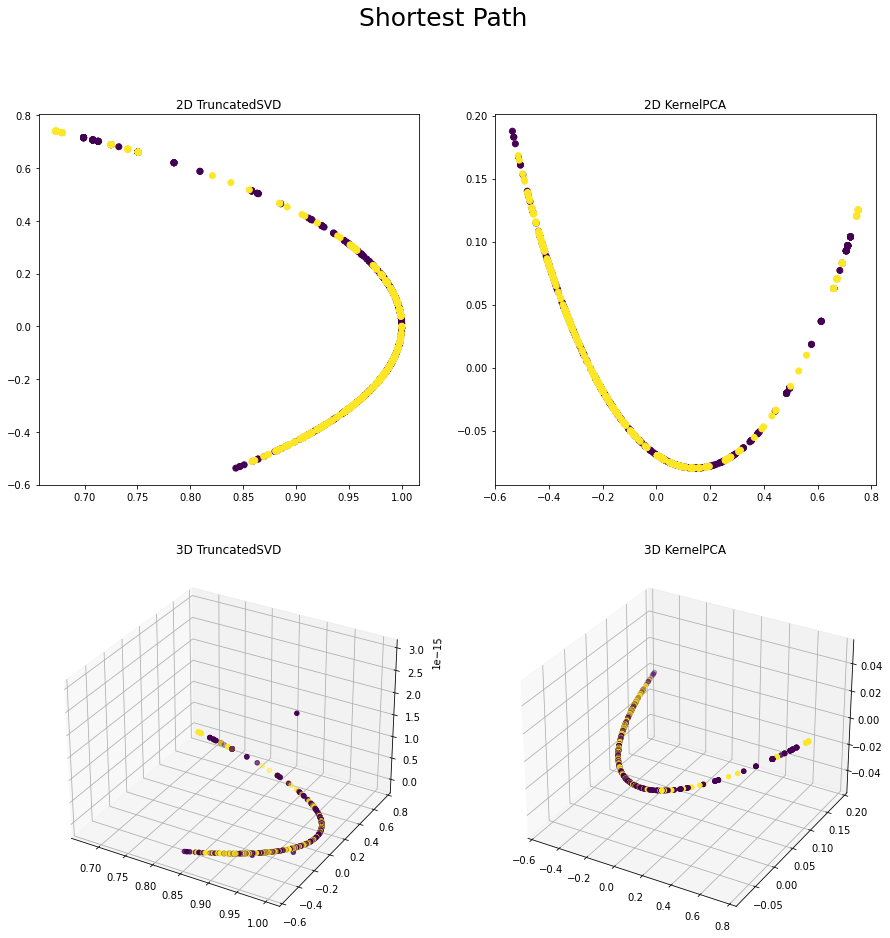

________________________________________________________________________________________



In [9]:
visualization.showEntireDataset(wl_listG, wl_listV, tsvd_graphlet_vectors, kpca_graphlet_gram, tsvd_shortestpath_vectors, kpca_shortestpath_gram, classes)

TODO: DESCRIBE PLOTS

Note: Since we have now shown that the shapes of the Weisfeller-Lehman datasets are rather similar, we will only look at dataset "Weisfeller-Lehman 5" in further data analysis.

In the code below we plot one boxplot each for the first two dimentions of the Weisfeiler-Lehman dataset, to help us determine the ranges, that classify datapoints as outliers for that specific data set. After the boxplots, we visualize 3 datasets. The "normal" Weisfeiler-Lehman, Weisfeiler-Lehman without outliers and the outliers of the dataset:

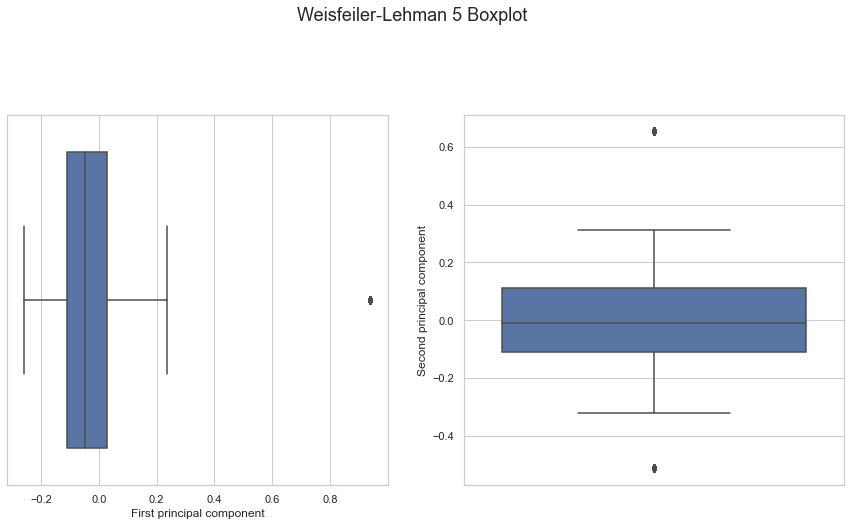

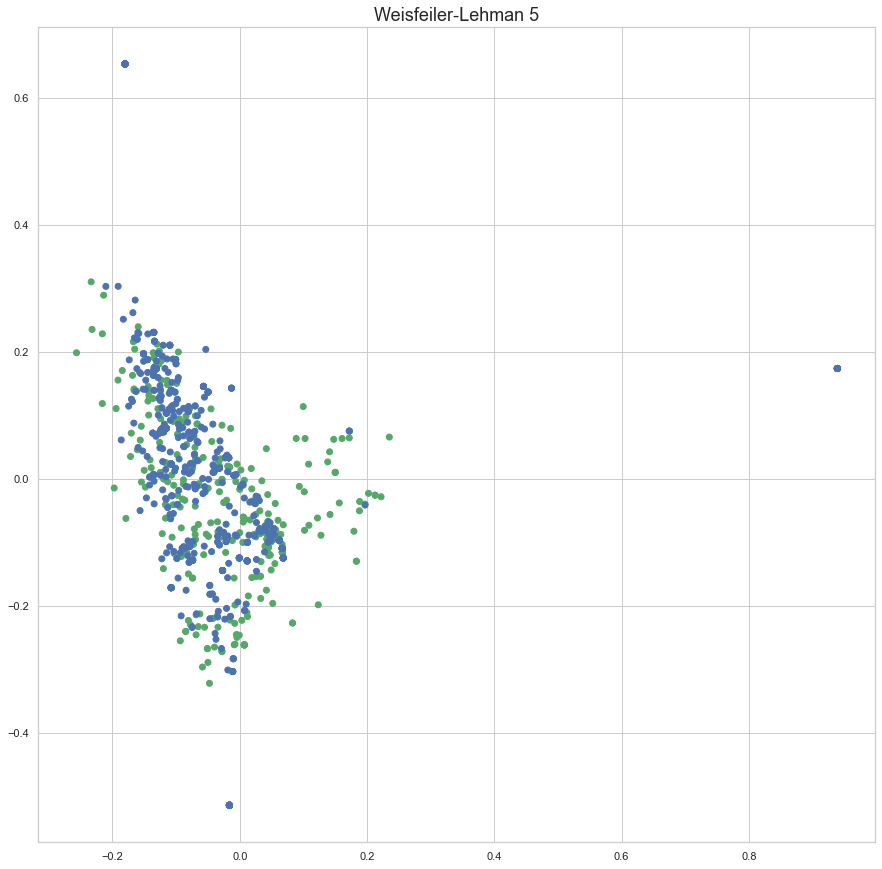

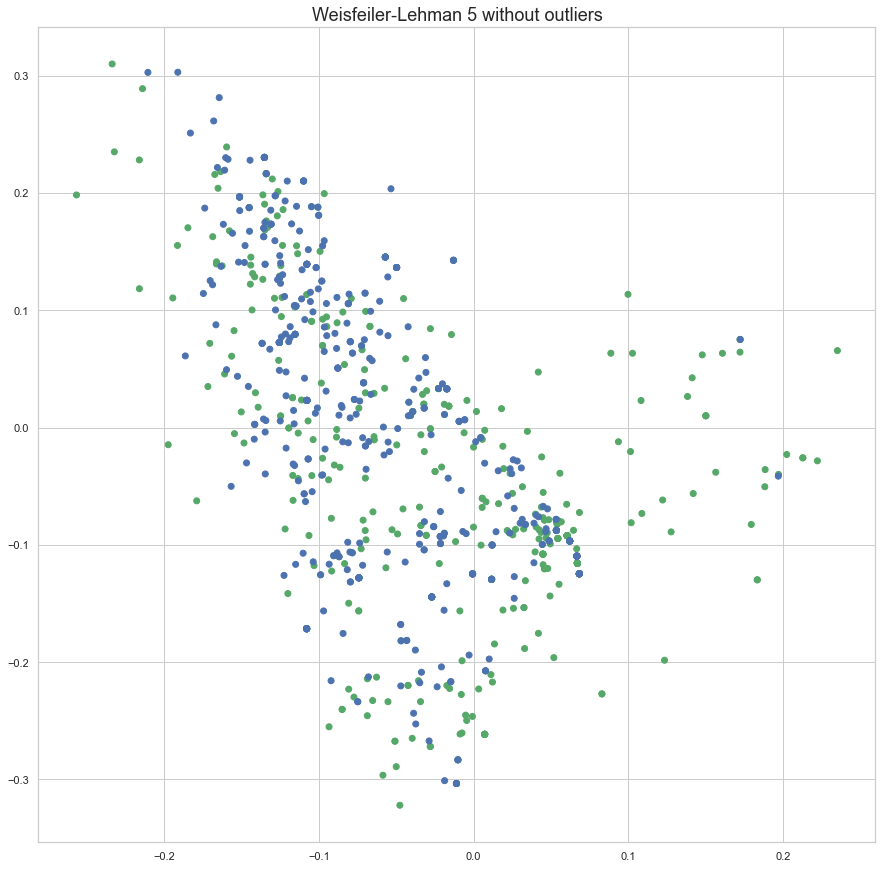

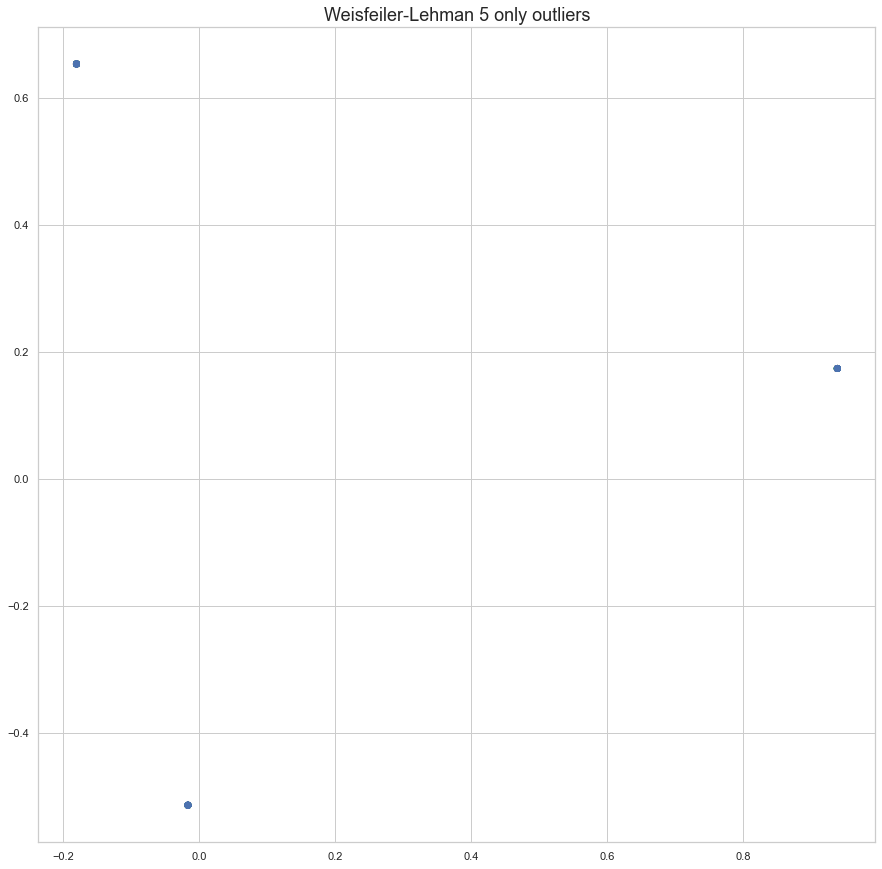

In [10]:
visualization.showBoxplot(kpca_wl5_gram, "Weisfeiler-Lehman 5 Boxplot")

visualization.scatterPlot2DBig(kpca_wl5_gram, "Weisfeiler-Lehman 5", classes)

wl5WithoutOutliers, wl5outlierIndex = outlier_detection.seperateOutliersWithRange(kpca_wl5_gram, -0.3, 0.4, -0.4, 0.4, returnOutliers=False)
visualization.scatterPlot2DBig(wl5WithoutOutliers, "Weisfeiler-Lehman 5 without outliers", classes)


wl5OnlyOutliers, wl5outlierIndex = outlier_detection.seperateOutliersWithRange(kpca_wl5_gram, -0.3, 0.4, -0.4, 0.4, returnOutliers=True)
visualization.scatterPlot2DBig(wl5OnlyOutliers, "Weisfeiler-Lehman 5 only outliers", classes)

In [11]:
outlier_detection.printOutlierCount(wl5outlierIndex, "Analyzing the Weisfeiler-Lehman 5 outliers")


Analyzing the Weisfeiler-Lehman 5 outliers: 
Number of datapoints without outliers:  897
Number of outliers:                     103


In the code below we plot one boxplot each for the first two dimentions of the Shortest Path dataset, to help us determine the ranges, that classify datapoints as outliers for that specific data set. After the boxplots, we visualize 3 datasets. The "normal" Shortest Path, Shortest Path without outliers and the outliers of the dataset:

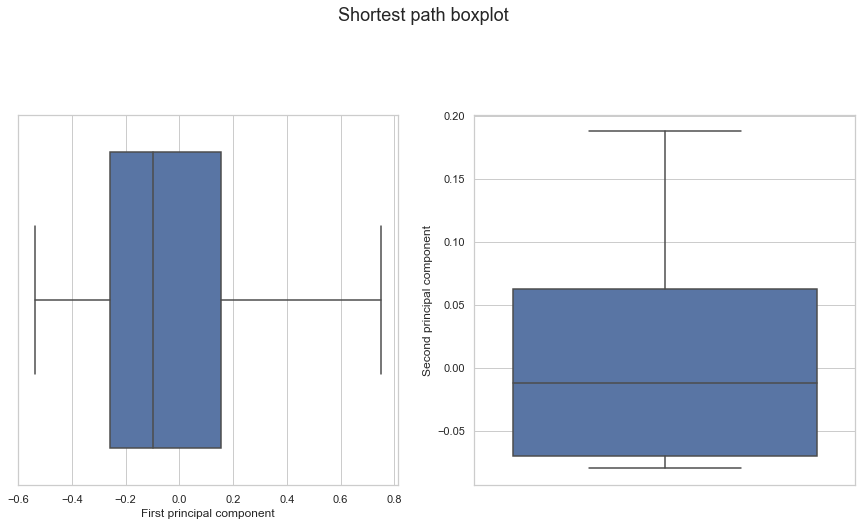

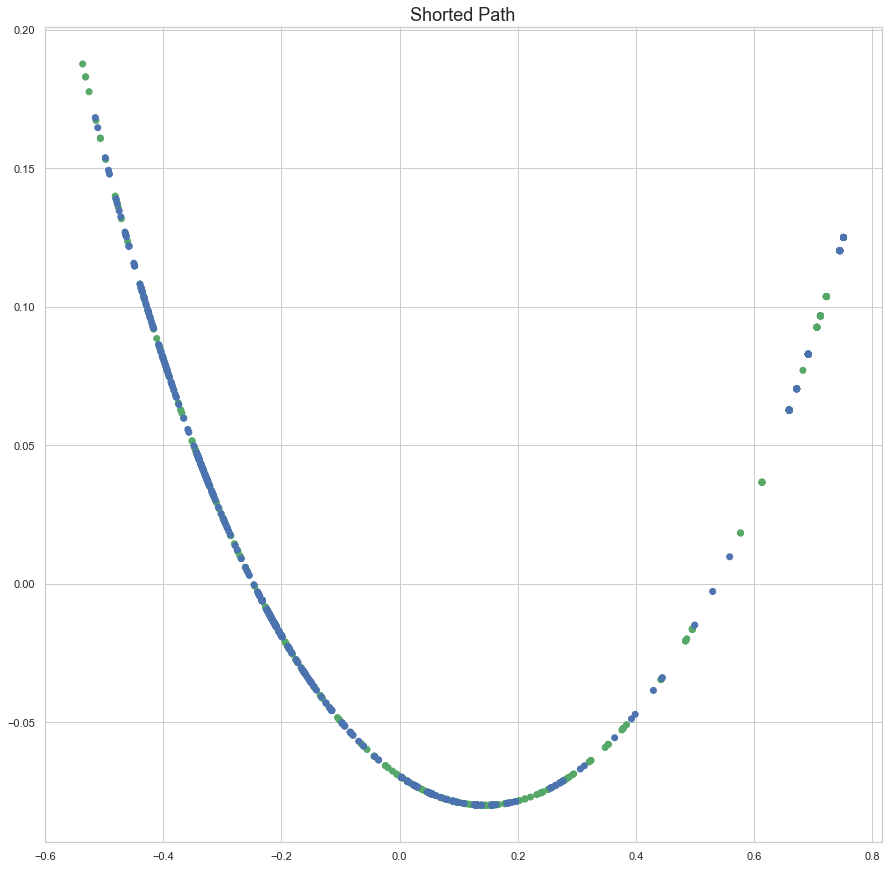

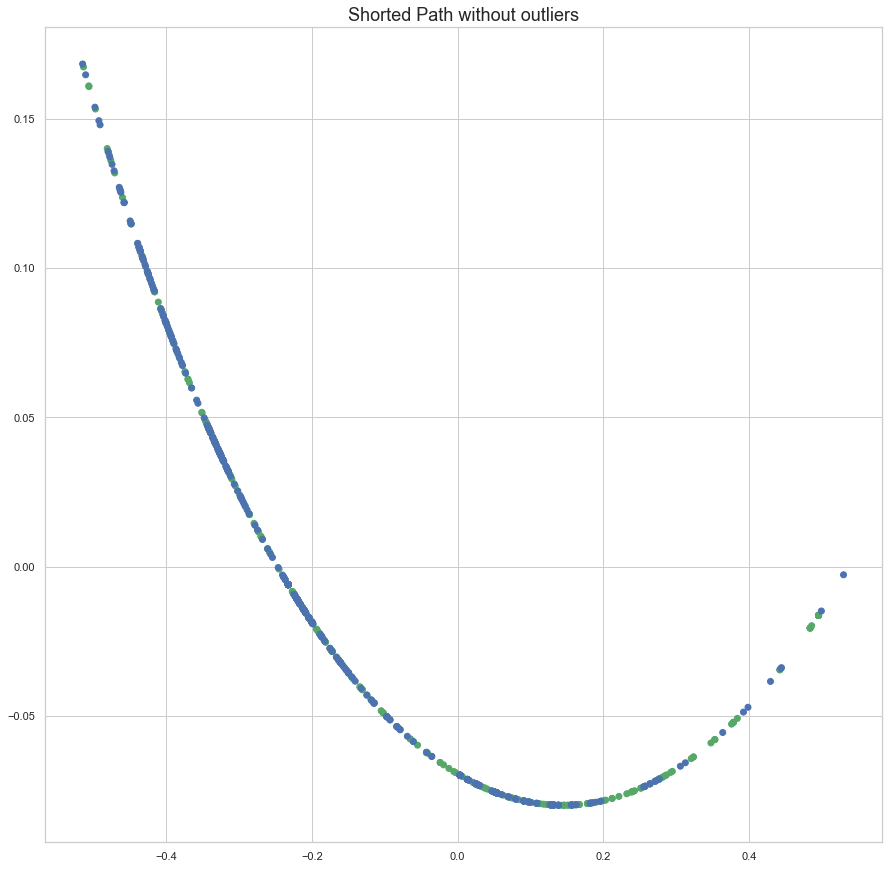

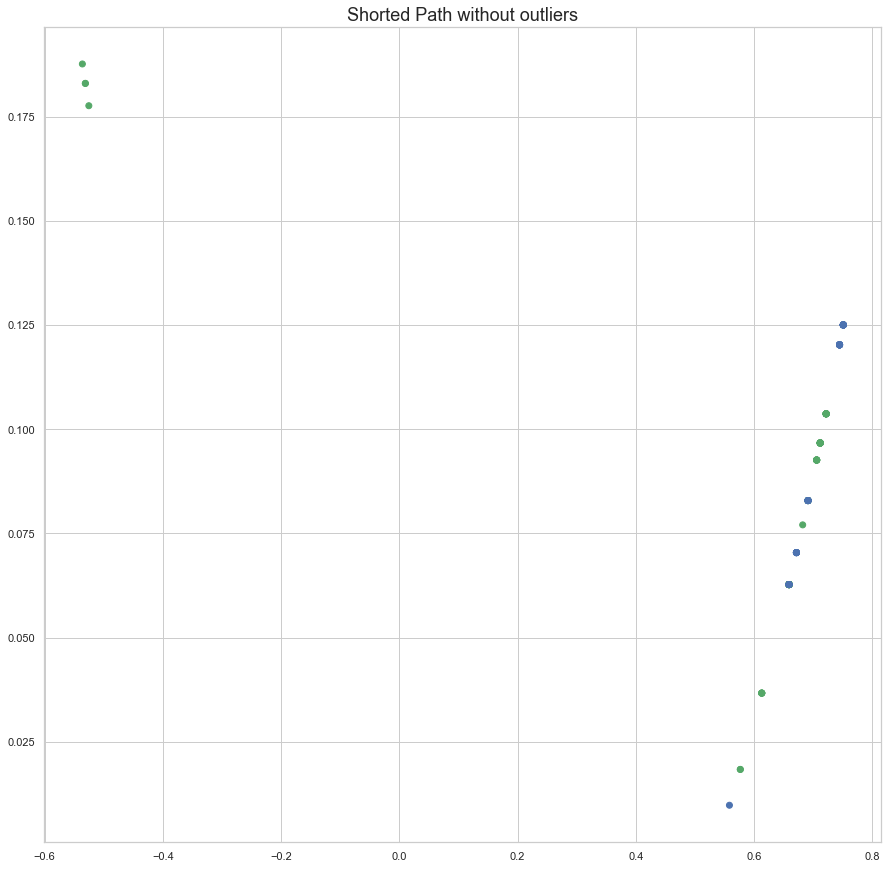

In [12]:
visualization.showBoxplot(kpca_shortestpath_gram, "Shortest path boxplot")

visualization.scatterPlot2DBig(kpca_shortestpath_gram, "Shorted Path", classes)

shortestPathWithoutOutliers, shortestPathOutlierIndex = outlier_detection.seperateOutliersWithRange(kpca_shortestpath_gram, -0.6, 0.55, -0.2, 0.175, returnOutliers=False)
visualization.scatterPlot2DBig(shortestPathWithoutOutliers, "Shorted Path without outliers", classes)

shortestPathOnlyOutliers, shortestPathOutlierIndex = outlier_detection.seperateOutliersWithRange(kpca_shortestpath_gram, -0.6, 0.55, -0.2, 0.175, returnOutliers=True)
visualization.scatterPlot2DBig(shortestPathOnlyOutliers, "Shorted Path without outliers", classes)

In [13]:
outlier_detection.printOutlierCount(shortestPathOutlierIndex, "Analyzing the Shortest Path outliers")


Analyzing the Shortest Path outliers: 
Number of datapoints without outliers:  849
Number of outliers:                     151


In the code below we plot one boxplot each for the first two dimentions of the Graphlet dataset, to help us determine the ranges, that classify datapoints as outliers for that specific data set. After the boxplots, we visualize 3 datasets. The "normal" Graphlet, Graphlet without outliers and the outliers of the dataset:

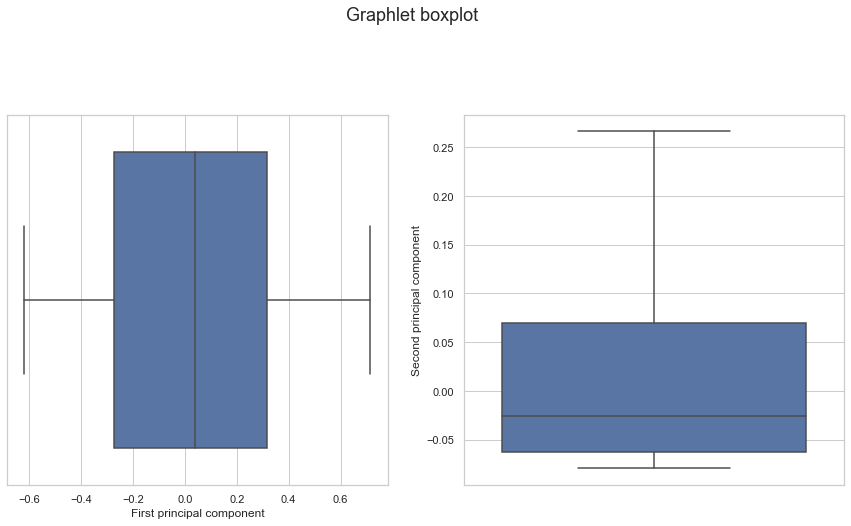

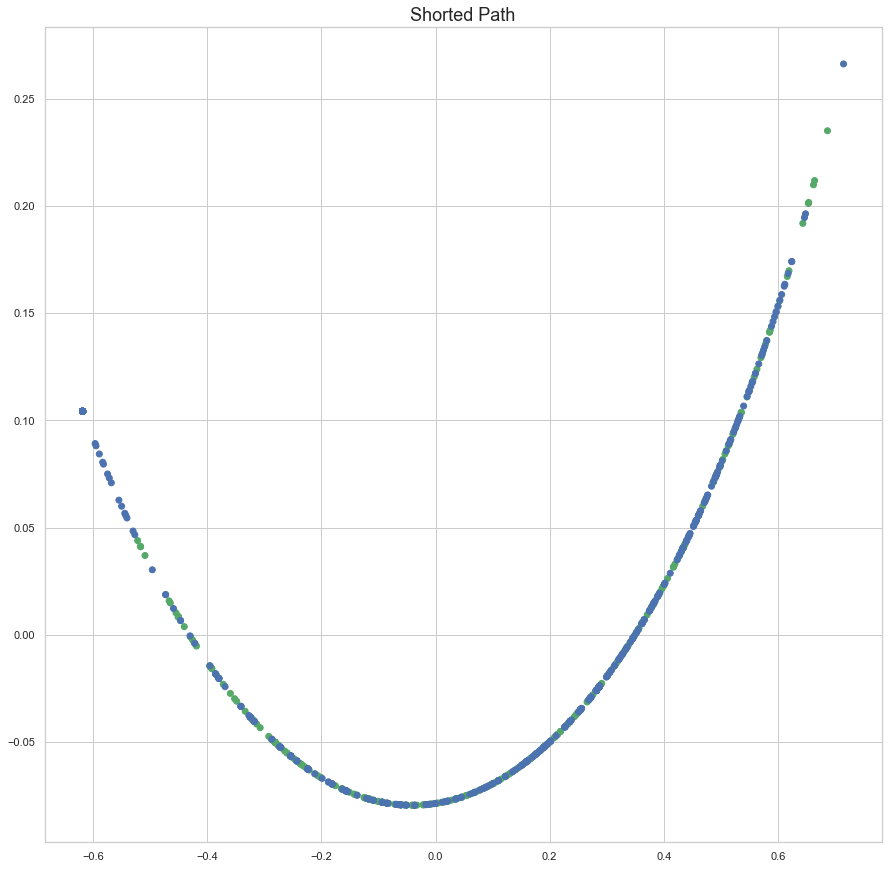

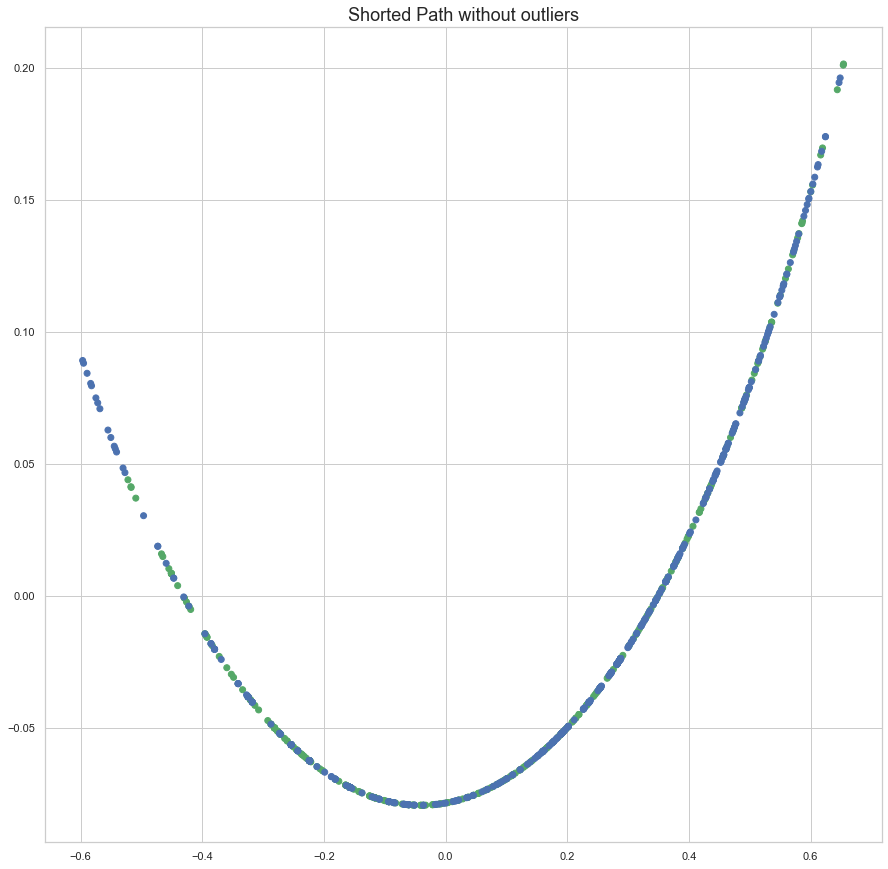

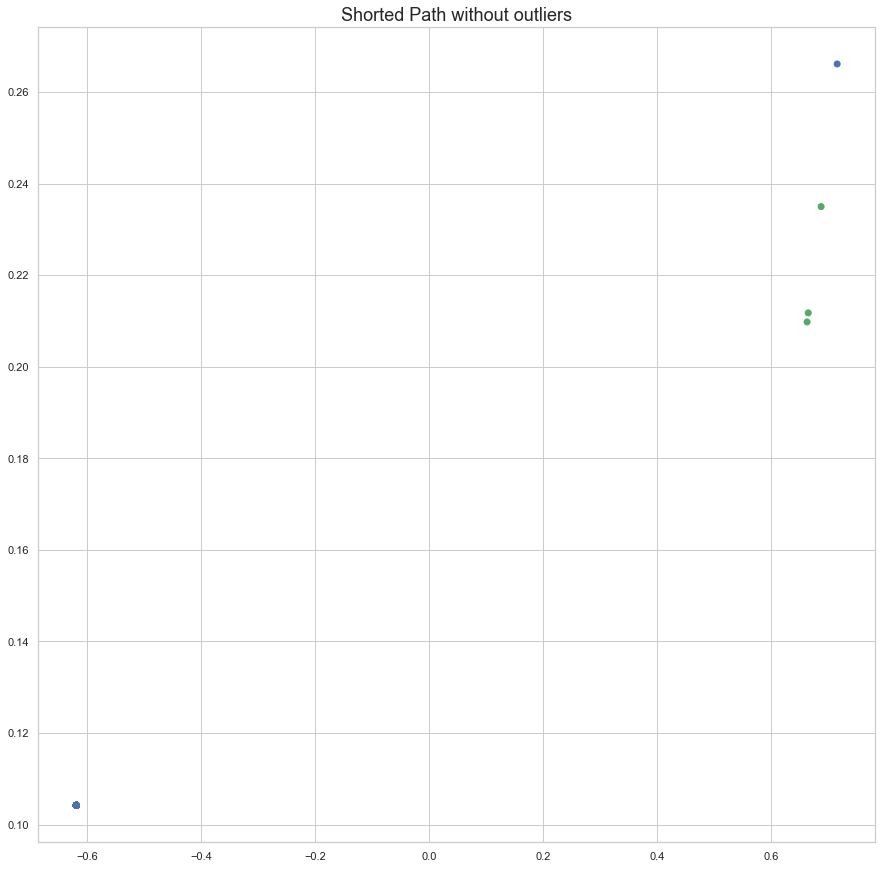

In [14]:
visualization.showBoxplot(kpca_graphlet_gram, "Graphlet boxplot")

visualization.scatterPlot2DBig(kpca_graphlet_gram, "Shorted Path", classes)

graphletWithoutOutliers, graphletOultiersIndex = outlier_detection.seperateOutliersWithRange(kpca_graphlet_gram, -0.6, 0.66, -0.2, 0.22, returnOutliers=False)
visualization.scatterPlot2DBig(graphletWithoutOutliers, "Shorted Path without outliers", classes)

graphletOnlyOutliers, graphletOultiersIndex = outlier_detection.seperateOutliersWithRange(kpca_graphlet_gram, -0.6, 0.66, -0.2, 0.22, returnOutliers=True)
visualization.scatterPlot2DBig(graphletOnlyOutliers, "Shorted Path without outliers", classes)

In [15]:
outlier_detection.printOutlierCount(graphletOultiersIndex, "Analyzing the Graphlet outliers")


Analyzing the Graphlet outliers: 
Number of datapoints without outliers:  857
Number of outliers:                     143


In [16]:
sharedOutliers = [0] * 1000
sharedOutliersBool = [False] * 1000
for i in range(len(imdb_networkx)):
    if wl5outlierIndex[i] == 1 and shortestPathOutlierIndex[i] == 1 and graphletOultiersIndex[i] == 1:
        sharedOutliers[i] = 1
        sharedOutliersBool[i] = True
outlier_detection.printOutlierCount(sharedOutliers, "SHARED OUTLIERS")


SHARED OUTLIERS: 
Number of datapoints without outliers:  952
Number of outliers:                     48


In [17]:
imbd_networkWithoutOutliers = []
imbd_networkOnlyOutliers = []
for i in range(len(imdb_networkx)):
    if sharedOutliers[i] == 1:
        imbd_networkOnlyOutliers.append(imdb_networkx[i])
    else:
        imbd_networkWithoutOutliers.append(imdb_networkx[i])
        
print()
graph_analysis.getGraphDataByClass(imbd_networkWithoutOutliers,'IMDB Network without outliers')


print()
graph_analysis.getGraphDataByClass(imbd_networkOnlyOutliers, 'IMDB Network only outliers')



IMDB Network without outliers: 
Average number of edges:  98.0703781512605
Average number of nodes:  20.164915966386555
Average number of edges per nodes:  4.863416158774808
Average density:  0.4964473990509694
Number of isomorphic pairs:  2228

IMDB Network only outliers: 
Average number of edges:  66.0
Average number of nodes:  12.0
Average number of edges per nodes:  5.5
Average density:  1.0
Number of isomorphic pairs:  1128


If you look at the outliers analysis above, you see that they differ in every detail, in comparison to the network without outliers. Interesting to see is that the average density of the outlier ego-networks is 1. Therefore every node in any outlier ego-network is connected to every other node in the same ego-neall look the similar.

If you calculate $\binom{48}{2}$, you calculate how many combinations of outlier ego-networks there are. The result (=1128) equals the number of isomorphic pairs in the outlier ego-networks. Resulting that proves, that the outlier ego-networks are all the same.

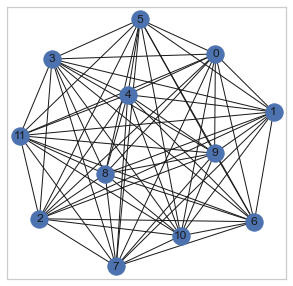

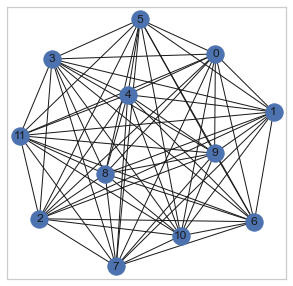

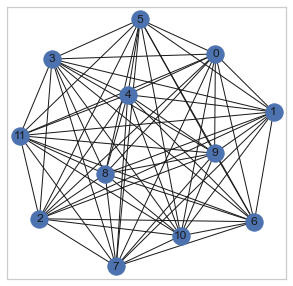

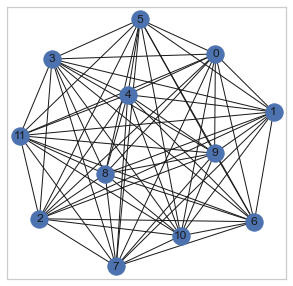

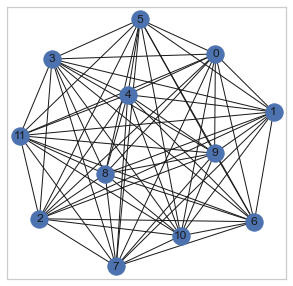

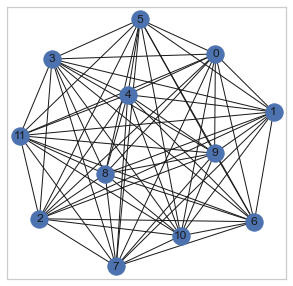

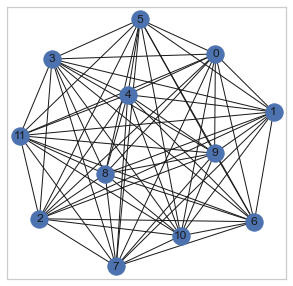

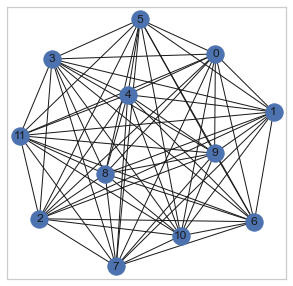

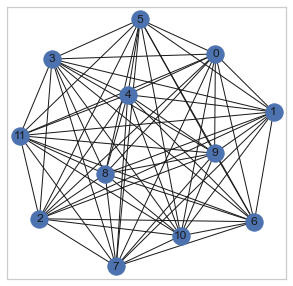

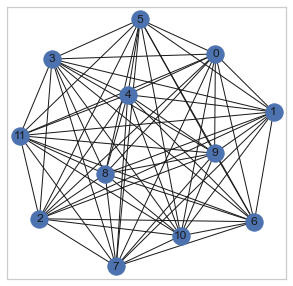

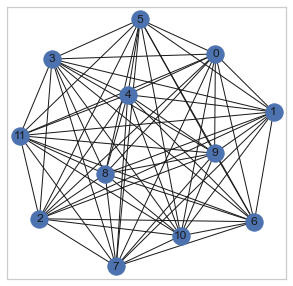

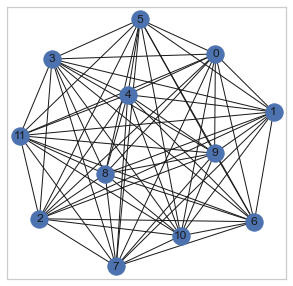

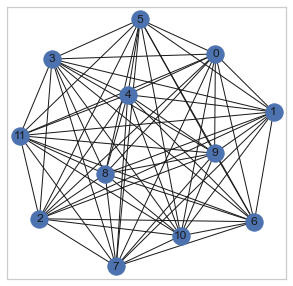

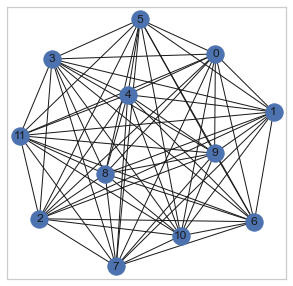

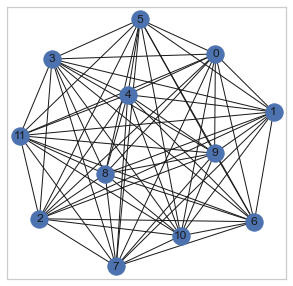

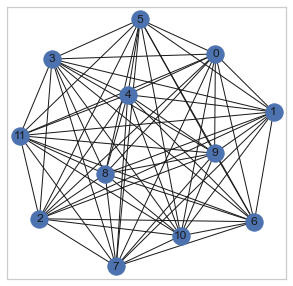

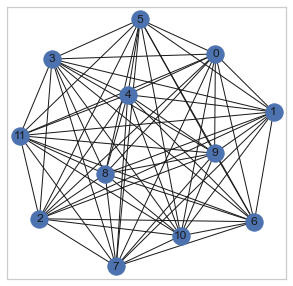

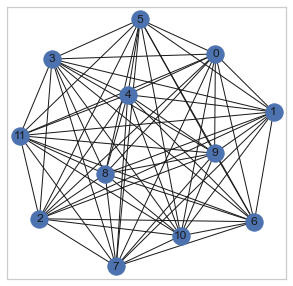

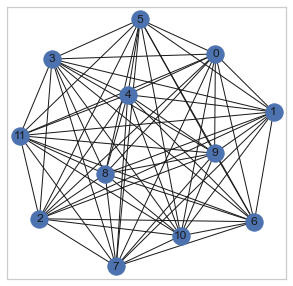

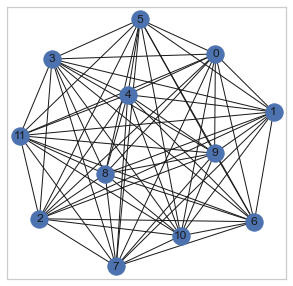

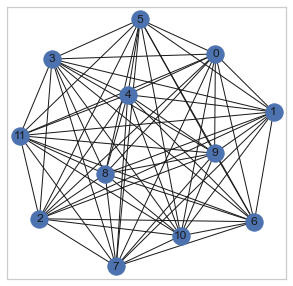

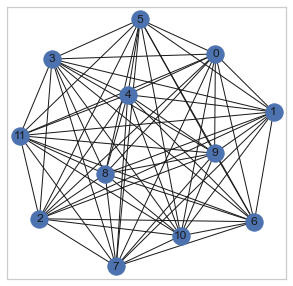

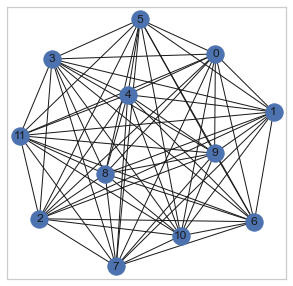

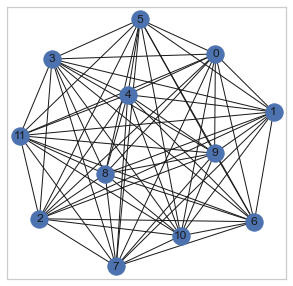

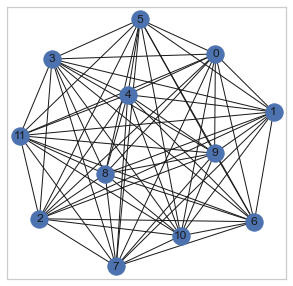

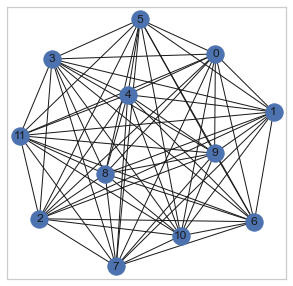

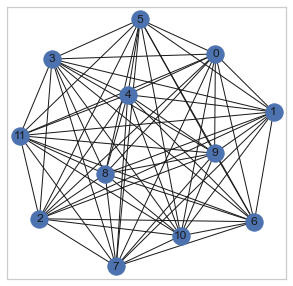

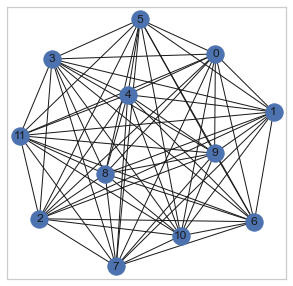

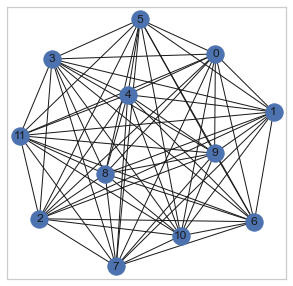

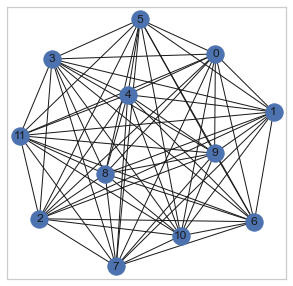

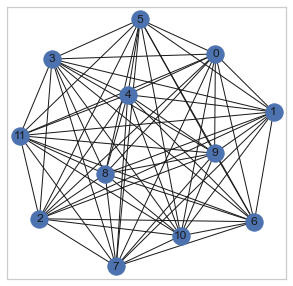

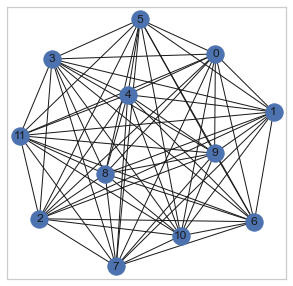

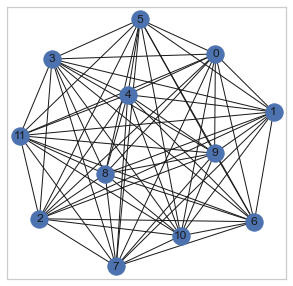

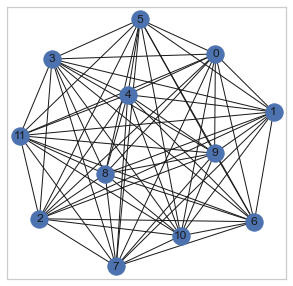

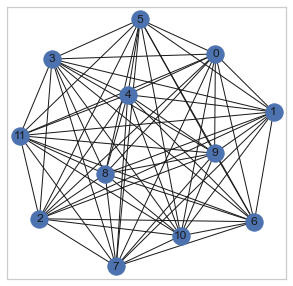

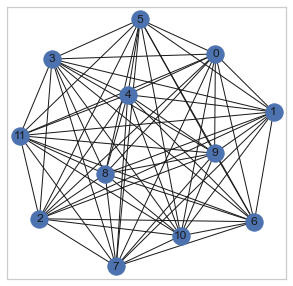

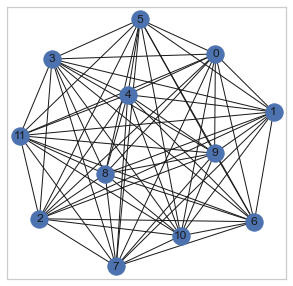

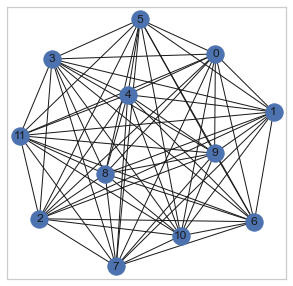

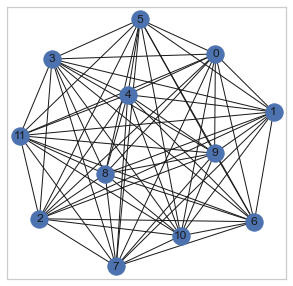

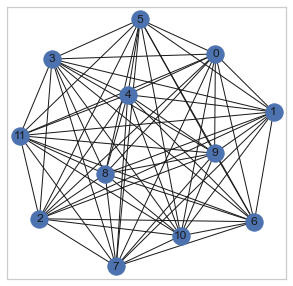

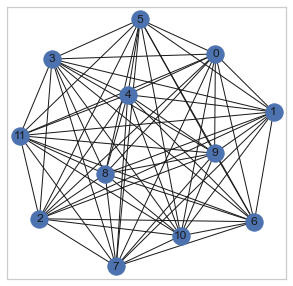

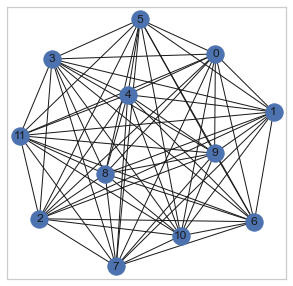

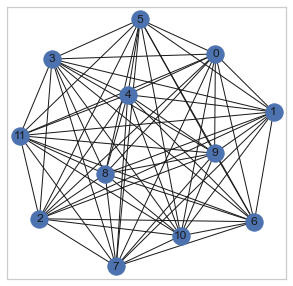

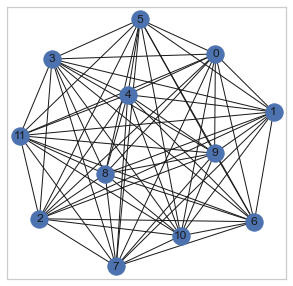

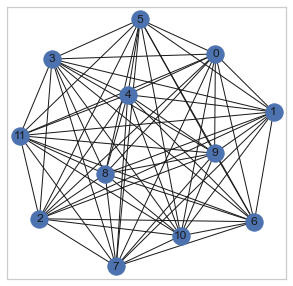

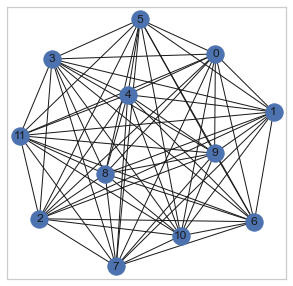

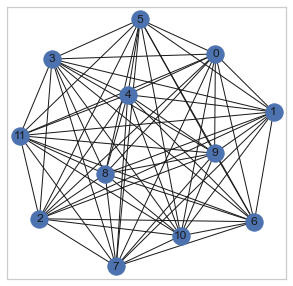

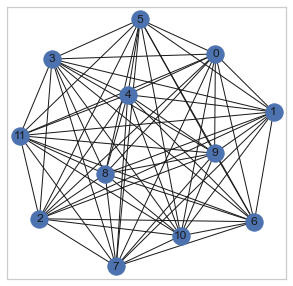

In [18]:
for i in range(0,len(imbd_networkOnlyOutliers)):
    visualization.visualize(imbd_networkOnlyOutliers[i])

# TODO Are the 

KernelPCA ausführen und 2D + selbst erzeugtes Feature anhängen und in 3D plotten um zu sehen ob es besser unterscheidbar ist?



In [19]:
kpca_wl5_gram1 = dimensionality_reduction.kernelPCA(imdb_wl5_gram, 1)
kpca_wl5_gram2 = dimensionality_reduction.kernelPCA(imdb_wl5_gram, 2)
kpca_wl5_gram3 = dimensionality_reduction.kernelPCA(imdb_wl5_gram, 3)

#kpca_graphlet_gram = dimensionality_reduction.kernelPCA(imdb_graphlet_gram, 2)
#kpca_shortestpath_gram = dimensionality_reduction.kernelPCA(imdb_shortestpath_gram, 2)

In [20]:
allDensities = [nx.density(graph) for graph in imdb_networkx]
allDensities = np.reshape(allDensities, (1000,1))

0.1360566448801743


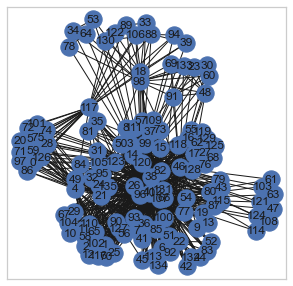

In [21]:
allEdges = [nx.number_of_edges(graph) for graph in imdb_networkx]
allEdges = np.reshape(allEdges, (1000,1))
#print(allEdges)
index = np.argmax(allEdges)
print(nx.density(imdb_networkx[index]))
visualization.visualize(imdb_networkx[index])

In [22]:
allNodes = [nx.number_of_nodes(graph) for graph in imdb_networkx]
allNodes = np.reshape(allNodes, (1000,1))

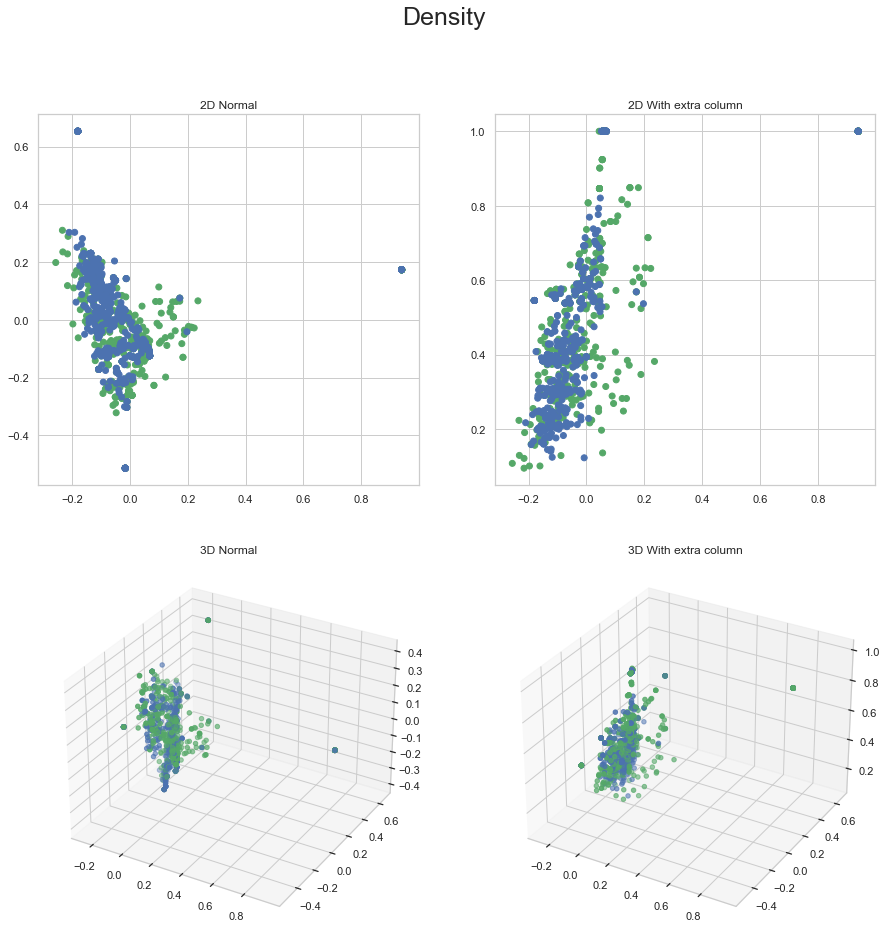

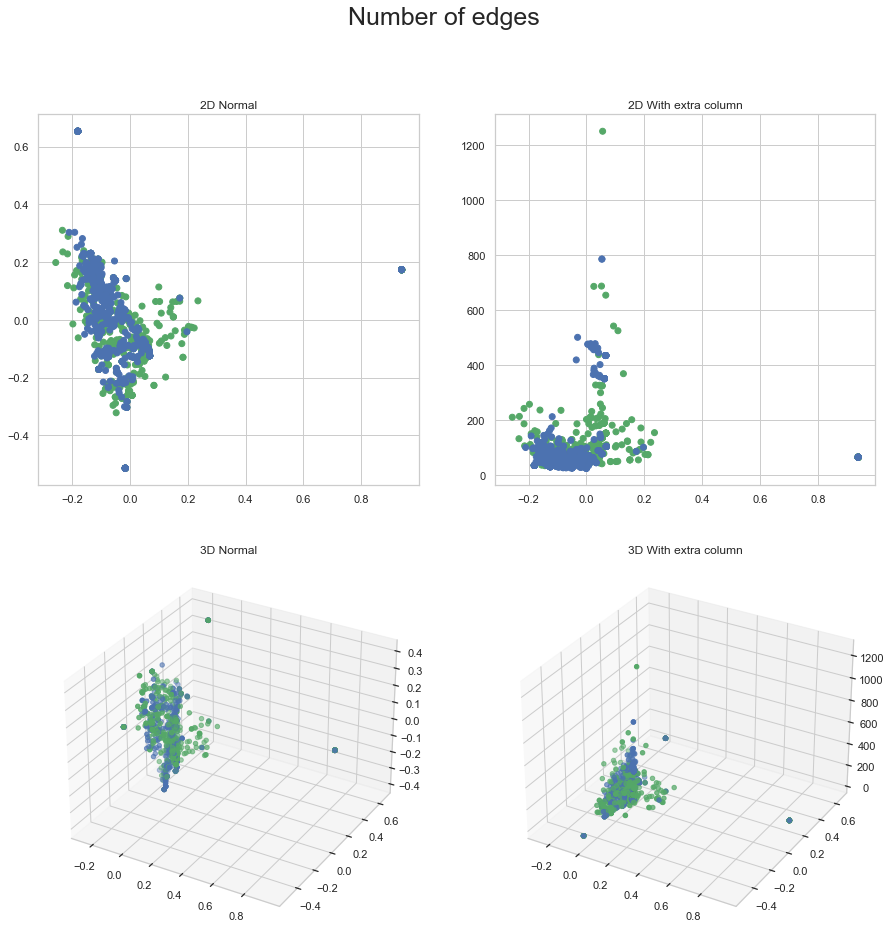

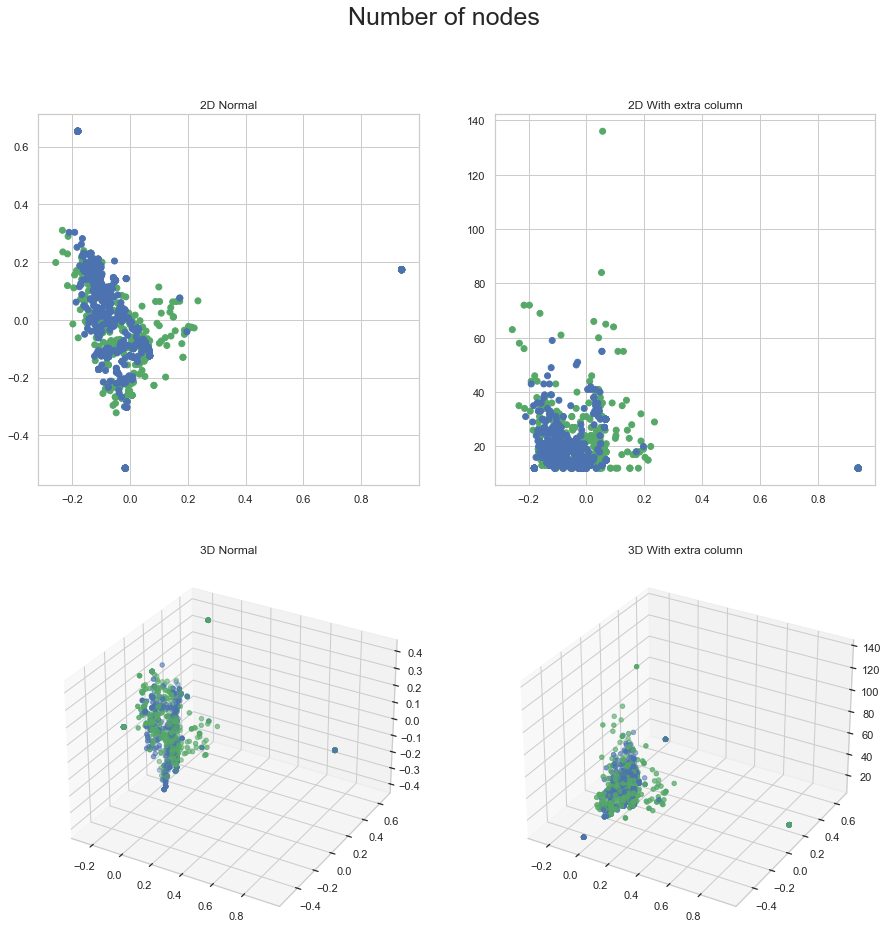

In [23]:
visualization.two3DPlots(kpca_wl5_gram3, allDensities, classes, "Density")
visualization.two3DPlots(kpca_wl5_gram3, allEdges, classes, "Number of edges")
visualization.two3DPlots(kpca_wl5_gram3, allNodes, classes, "Number of nodes")

In [130]:
kpca_wl5_gram = dimensionality_reduction.kernelPCA(imdb_wl5_gram, 100)
wl5WithoutOutliers = np.delete(wl5WithoutOutliers, np.where(wl5WithoutOutliers[:,0] == None)[0],0)
wl5LabelsReduced = clustering.kMeans(wl5WithoutOutliers[:,0:3],2)

In [131]:
wl5ExtraFeatureReducesLabels = np.append(kpca_wl5_gram2, allDensities, axis=1)
wl5ExtraFeatureReducesLabels = outlier_detection.removeOutliers(wl5ExtraFeatureReducesLabels, wl5outlierIndex)
wl5ExtraFeatureReducesLabels = np.delete(wl5ExtraFeatureReducesLabels, np.where(wl5ExtraFeatureReducesLabels[:,0] == None)[0],0)
wl5ExtraFeatureReducesLabels = clustering.kMeans(wl5WithoutOutliersReducedExtraFeature[:,0:3],2)

In [134]:
print(normalized_mutual_info_score(classesWl5Reduces, wl5LabelsReduced))

0.01532774073764057


In [135]:
print(normalized_mutual_info_score(classesWl5Reduces, wl5ExtraFeatureReducesLabels))

0.013988877294463856


# TODO

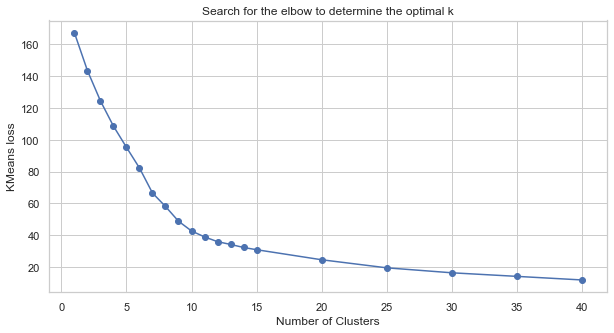

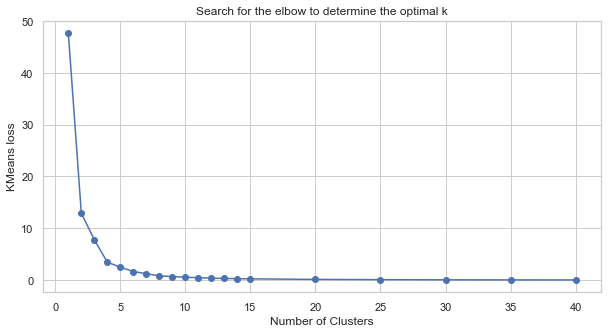

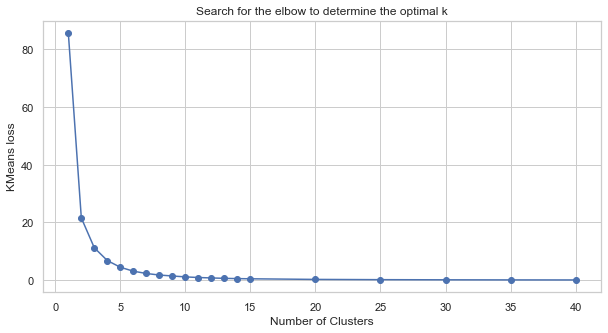

In [24]:
#gram_wl = utility_functions.load_csv("../../graph_representations/without_labels/IMDB-BINARY_gram_matrix_wl5.csv")
#wl5WitoutOuliers = aux.normalize_gram_matrix(wl5WitoutOuliers) 
#wl5WitoutOuliers = dimensionality_reduction.kernelPCA(wl5WitoutOuliers,100)
wl5WithoutOutliersReduced = np.delete(wl5WithoutOutliers, np.where(wl5WithoutOutliers[:,0] == None)[0],0)
shortestPathWithoutOutliersReduced = np.delete(shortestPathWithoutOutliers, np.where(shortestPathWithoutOutliers[:,0] == None)[0],0)
graphletWithoutOutliersReduced = np.delete(graphletWithoutOutliers, np.where(graphletWithoutOutliers[:,0] == None)[0],0)

clustering.kMeans_scree_plot(wl5WithoutOutliersReduced)
clustering.kMeans_scree_plot(shortestPathWithoutOutliersReduced)
clustering.kMeans_scree_plot(graphletWithoutOutliersReduced)


In [25]:
wl5WithoutOutliersReduced = np.delete(kpca_wl5_gram, np.where(sharedOutliersBool == True),0)
graphletWithoutOutliersReduced = np.delete(kpca_graphlet_gram, np.where(sharedOutliersBool == True),0)
shortestPathWithoutOutliersReduced = np.delete(kpca_shortestpath_gram, np.where(sharedOutliersBool == True),0)

The scree plots above let us set the optimal k for clustering the three datasets without outliers with the KMeans algorithm to evaluate the pairwise NMI scores between the three datasets. We choose n_clusters=7. 

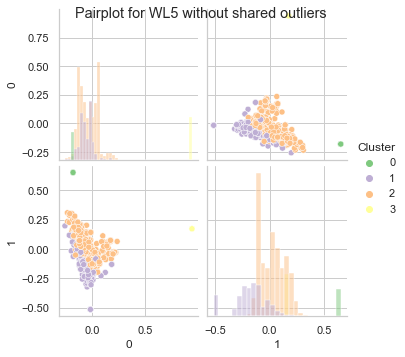

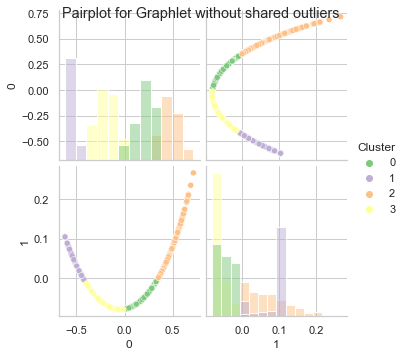

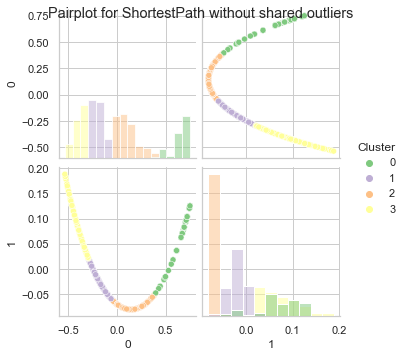

The NMI between Wl5 and Graphlet is:  0.16941037857190283
The NMI between Wl5 and Shortest Path is:  0.1566983381204158
The NMI between Shortest Path and Graphlet is:  0.6346288180208687


In [26]:
from sklearn.metrics import normalized_mutual_info_score
n_clusters = 4
wl5WithoutOutliersReduced_labels = clustering.kMeans(wl5WithoutOutliersReduced[:,0:10],n_clusters)
graphletWithoutOutliersReduced_labels = clustering.kMeans(graphletWithoutOutliersReduced[:,0:10],n_clusters)
shortestPathWithoutOutliersReduced_labels = clustering.kMeans(shortestPathWithoutOutliersReduced[:,0:10],n_clusters)

clustering.showPairPlot(wl5WithoutOutliersReduced[:,0:2],wl5WithoutOutliersReduced_labels,'Pairplot for WL5 without shared outliers')
clustering.showPairPlot(graphletWithoutOutliersReduced[:,0:2],graphletWithoutOutliersReduced_labels,'Pairplot for Graphlet without shared outliers')
clustering.showPairPlot(shortestPathWithoutOutliersReduced[:,0:2],shortestPathWithoutOutliersReduced_labels,'Pairplot for ShortestPath without shared outliers')

print("The NMI between Wl5 and Graphlet is: ",normalized_mutual_info_score(wl5WithoutOutliersReduced_labels,graphletWithoutOutliersReduced_labels))
print("The NMI between Wl5 and Shortest Path is: ",normalized_mutual_info_score(wl5WithoutOutliersReduced_labels,shortestPathWithoutOutliersReduced_labels))
print("The NMI between Shortest Path and Graphlet is: ",normalized_mutual_info_score(shortestPathWithoutOutliersReduced_labels,graphletWithoutOutliersReduced_labels))